<a href="https://colab.research.google.com/github/cribosoft/Analiza_Dow_Jones/blob/main/Analiza_Dow_Jones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dow Jones index evolution analysis

**Purpose:** Presenting the main statistical indicators for the Dow Jones stock index, using presentation methods similar to those of the National Institute of Statistics.
**Period analyzed:** 1914–1968  

---




**Analysis structure**

1.  Data loading and preparation
2.  Index (base 100)
3.  Choosing analysis periods
4.  Calculating indicators for each period
5.  Detailed views for each period
6.  Data interpretation (INS style)
1.  Final conclusions

---



**1. Data loading and prepartion**




In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DateOffset

In [ ]:
df = sns.load_dataset('dowjones')
print(df.info(), 'info\n')
print(df.describe(), 'descriere\n')
print(df.isnull().sum(), 'suma valorilor null')
print(df.index.duplicated().sum(), 'duplicate\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    649 non-null    datetime64[ns]
 1   Price   649 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.3 KB
None info

                                Date       Price
count                            649  649.000000
mean   1941-11-30 17:42:48.258859776  290.807319
min              1914-12-01 00:00:00   46.850000
25%              1928-06-01 00:00:00  106.900000
50%              1941-12-01 00:00:00  172.270000
75%              1955-06-01 00:00:00  436.730000
max              1968-12-01 00:00:00  985.930000
std                              NaN  256.062906 descriere

Date     0
Price    0
dtype: int64 suma valorilor null
0 duplicate



**Descriptive statistics elements of the Dow Jones data set**
| Descriptive statistics | Date          | Price          |
|------------------------|---------------|----------------|
| **Valid**              | 649           |649             |
| **Missing**            | 0             | 0              |
| **Median**             | 30.11.1941    | 290.81         |
| **Min**                | 12.01.1914    | 46.05          |
| **25%**                | 01.06.1928    | 106.90         |
| **50%**                | 01.12.1941    | 172.27         |
| **75%**                | 01.06.1955    | 436.73         |
| **Max**                | 01.12.1968    | 985.93         |
| **std**                | NaN           | 256.06         |
| **Data type**          | datetime64[ns]| float64        |
---

**2. Index base 100**


I chose the base 100 index to normalize the data set, after a reference year, which meets several criteria, as follows:

* **Economically/politically stable** – without major wars, financial crises or hyperinflation.  
  - 1929–1933 - The Great Depression - unstable.  
  - 1939–1945 - World War II - excluded.  
  - After 1945, the period of reconstruction and stable economic growth begins in the USA.  

* **Representative** – not at an extreme minimum or maximum, but in an "average" area of ​​evolution.  
  - The indicator values ​​should be close to the average of the analyzed period.
  - Reflect general market trends, not exceptions.  

According to the above criteria, I chose **1950 as the reference year**.

---

**3. Choosing  the period to be analyzed**
  - 1914–1918 - World War I
  - 1918-1939 - Interbelic Time  
  - 1929–1933 - The Great Depression  
  - 1939–1945 - World War II  
  - 1950-1960 - Post War period  - growth period  


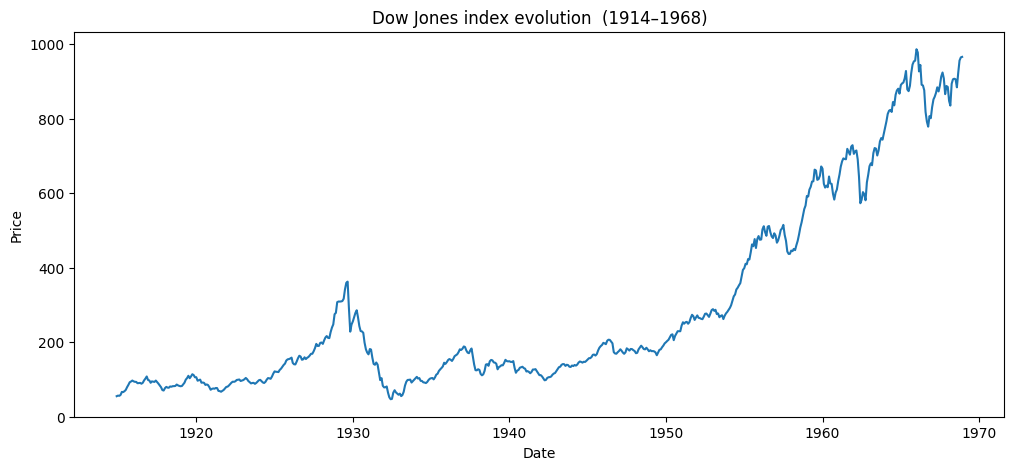

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x="Date", y="Price")
plt.title("Dow Jones index evolution  (1914–1968)")
plt.show()

---
**4. Calculation of indicators for each period**

*   create ***dj_custom*** function to filter each time period
*   create ***calc_stats*** functions for base statistics for each period


In [ ]:
def dj_custom(start, month):
    start = pd.Timestamp(start)                 #Timestamp in pandas equivalent datetime in pyth. Useful on a data column
    end = start + pd.DateOffset(years=0, months=month, days=0)    #DateOffset applied to Timestamp creates datetime periods/sets
    perioada = df[(df['Date'] >= start) & (df['Date'] <= end)]
    return perioada
print(dj_custom('1931-04-01', 3))

          Date   Price        MA12
196 1931-04-01  158.00  202.679167
197 1931-05-01  141.45  192.241667
198 1931-06-01  139.30  183.587500
199 1931-07-01  145.35  176.550000


In [ ]:
#I create variables for each analysis period, as shown in point 3.
ww1 = dj_custom('1914-07-28', 52)   # 4 years and 4 month from 28.07.1914 until 28.11.1918
interbelic = dj_custom('1918-11-01', 252)  # 21 years Interbelic time
crash = dj_custom('1929-10-29', 48)   # 4 years The Great Depresion
ww2 = dj_custom('1939-09-01', 72)  # 6 years WWII
boom = dj_custom('1950-01-01', 120)   # 10 years Postbelic Time


In [ ]:
def calc_stats(perioada, ref=1950):
  return{
      'Average': round(perioada['Price'].mean(), 2),
      'Median': round(perioada['Price'].median(), 2),
      'Max': perioada['Price'].max(),
      'Min': perioada['Price'].min(),
      'Index base 100': round((perioada['Price'].iloc[-1] / df[df['Date'].dt.year==ref]['Price'].mean())*100, 2)
  }

In [ ]:
period = {
    "First War": ww1,
    "Interbelic Period": interbelic,
    "Crash": crash,
    "second war": ww2,
    "Boom_1950s": boom
}

rezultate = {name: calc_stats(data) for name, data in period.items()}
rez_df = pd.DataFrame(rezultate).T  # T transpose similar excel
rez_df


,Average,Median,Max,Min,Index base 100
First War,83.91,85.88,107.90,55.00,38.83
Interbelic Period,137.04,121.55,362.35,46.85,68.95
Crash,136.26,101.43,285.50,46.85,42.37
second war,133.81,134.04,177.80,97.70,82.20
Boom_1950s,391.27,398.43,671.35,199.79,307.62


---

**5. Detailed views for each period**


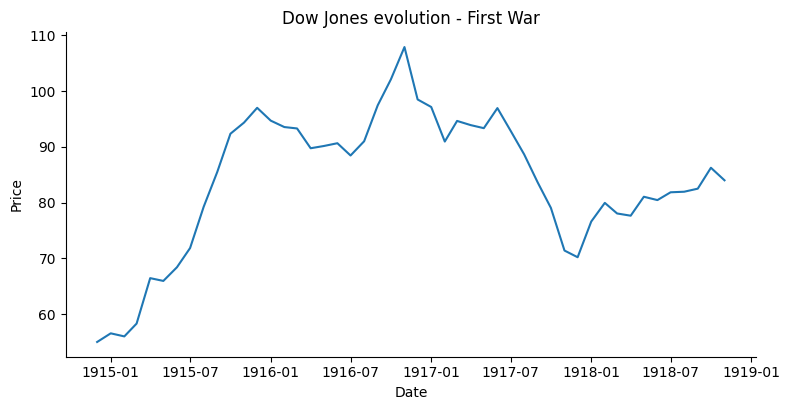

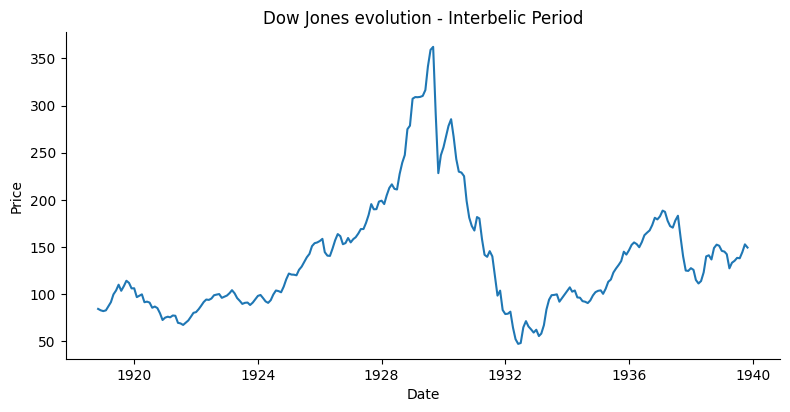

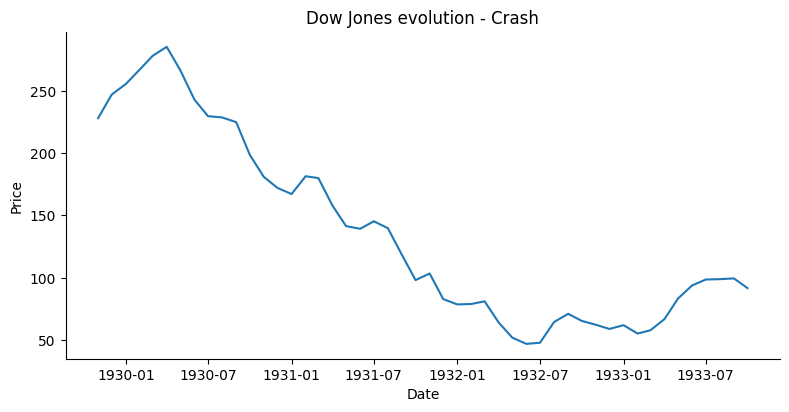

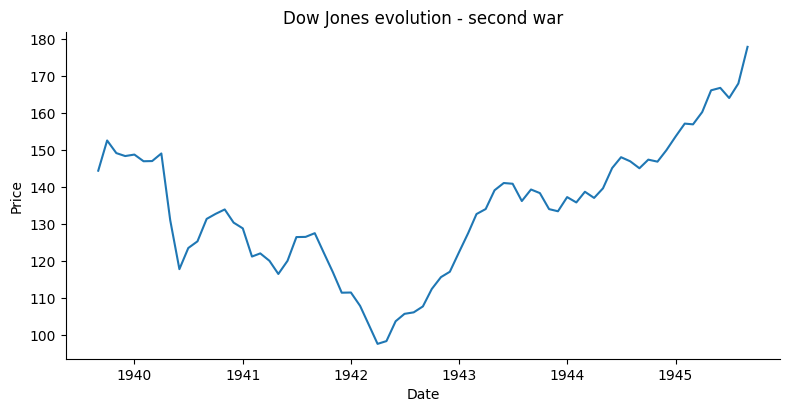

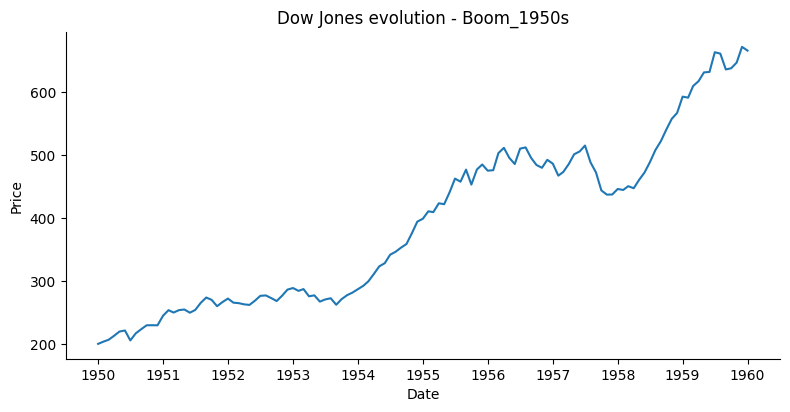

In [ ]:
for name, data in period.items():
    sns.relplot(data=data, x="Date", y="Price", kind='line', height=4, aspect=2)
    plt.title(f"Dow Jones evolution - {name}")


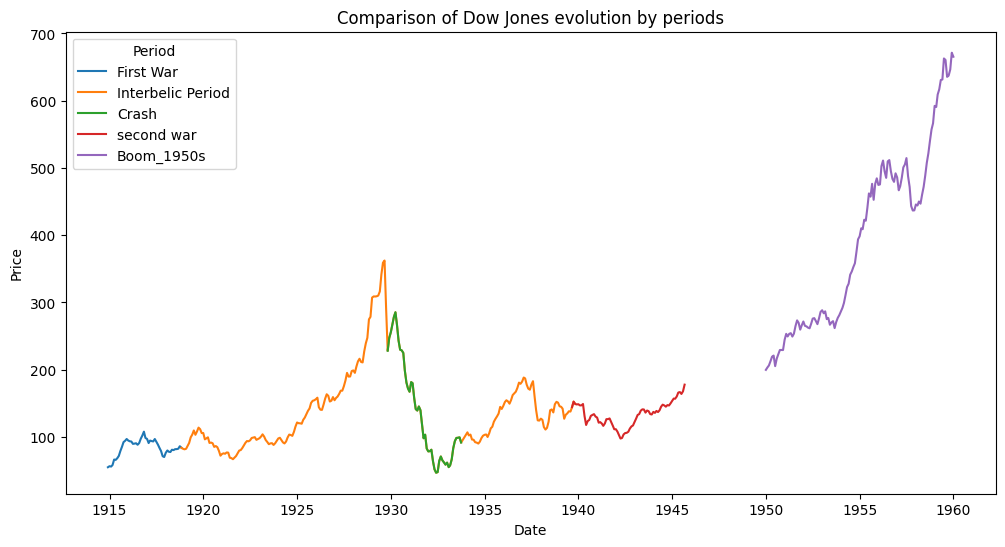

In [ ]:
# Combine all periods into a single DataFrame
df_combined = pd.concat(
    [data.assign(Period=name) for name, data in period.items()]
)

# Comparative chart
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=df_combined, x="Date", y="Price", hue="Period")
plt.title("Comparison of Dow Jones evolution by periods")
plt.legend(title="Period")

plt.show()

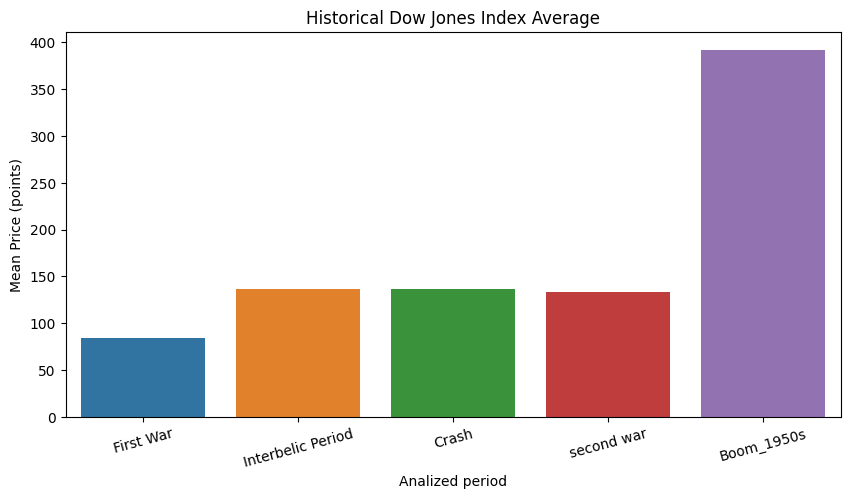

In [ ]:


# Prepare the data for ploting
plot_data = rez_df.reset_index().rename(columns={'index': 'Period'})

# Create chart using Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(data=plot_data, x="Period", y="Average", hue = "Period")

plt.title("Historical Dow Jones Index Average")
plt.xlabel("Analized period")
plt.ylabel("Mean Price (points)")

plt.xticks(rotation=15)

plt.show()

**6. Data Interpretation (INS Style)**

 **a. World War I**   
  - The Dow Jones index recorded a mean value of **83.91** points, with a median of **85.88**.  
  - Maxim value was **107.90**, and minim **55.00**.  
  - Index compared to the reference year 1950 (base 100) is **38.83**, indicating **underperformance**.  

 **b. Interbelic period**  
  - Mean Value: **137.04**, median: **121.55**.
  - Max: **362.35**, Min: **46.85**.  
  - Index base 100: **68.95**, indicating a **performance under the reference level**.  

 **c. The Great Depresion (1929–1933)**  
  - Mean: **136.26**, median: **101.43**.
  - Max: **285.5**, Min: **46.85**.  
  - Index base 100: **42.37**, indicating **underperformance**.

 **d. Second World War**  
  - Mean: **133.81**, median: **134.04**.
  - Max: **177.8**, Min: **97.7**.  
  - Index base 100: **82.20**, **performance under the reference level**.

 **e. Economic Boom (1950–1960)**  
  - Mean: **391.27**, median: **398.43**.
  - Max: **671.35**, Min: **199.79**.  
  - Index base 100: **307.62**, **performance OVER reference level**..

---

7. **Final Conclusions on the Evolution of the Dow Jones Index (1914–1968)**

Statistical analysis of the Dow Jones index over the last 54 years highlights profound structural transformations of the American economy, marked by geopolitical events and extreme economic cycles.

**Main observations:**
  - Post-crisis resilience: Although the "Crash" period (1929-1933) represented the most critical point in the index's history (with dramatic declines and a 100-base of only 42.37 compared to the 1950 reference), the market demonstrated a capacity for long-term recovery, although the process took decades.

  - Impact of world conflicts: - During World War I, the index had a modest average (83.91), reflecting global uncertainty.

  - World War II marked a transitional period in which, although the average remained below the reference level (Base Index 100: 82.20), the foundations for subsequent expansion were laid.

  - The Golden Age ("1950s, Boom"): This is clearly identified as the period of maximum prosperity. Index values ​​consistently exceeded previous historical averages, reflecting increased productivity and post-war investor optimism.

  - Volatility Lesson: Comparing averages with highs and lows, we see that stock market investments during this period required a long time horizon. The interwar period, although it had peaks (362.35), was extremely unstable.

Overall conclusion: The Dow Jones is not just an indicator of stock prices, but a "mirror" of modern history. From an average of less than 100 points in the early years of analysis, the market evolved to a maturity that transformed the stock market into a central pillar of the global economy by 1968.

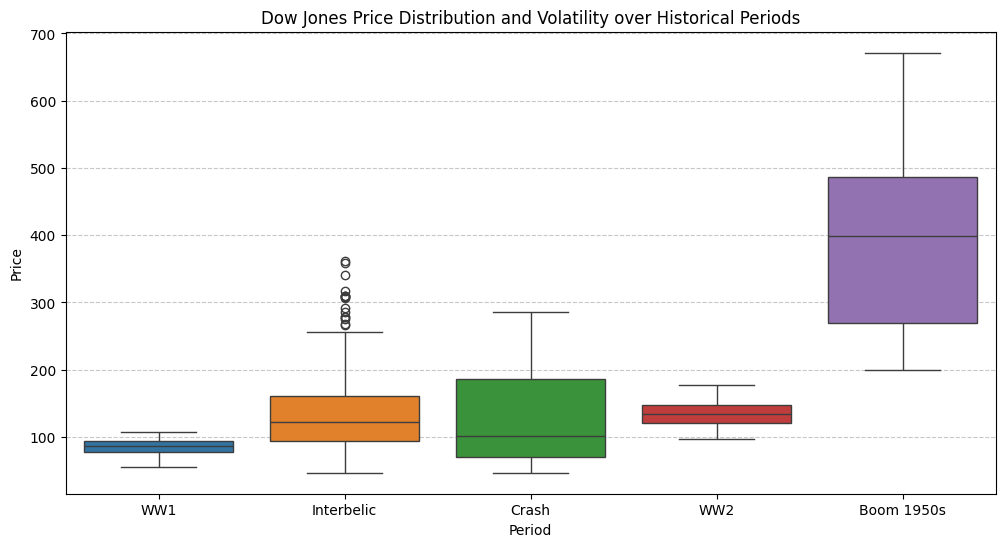

In [ ]:
# Creating a boxplot for comparing distributions
all_data = pd.concat([
    pd.DataFrame({'Price': ww1['Price'], 'Period': 'WW1'}),
    pd.DataFrame({'Price': interbelic['Price'], 'Period': 'Interbelic'}),
    pd.DataFrame({'Price': crash['Price'], 'Period': 'Crash'}),
    pd.DataFrame({'Price': ww2['Price'], 'Period': 'WW2'}),
    pd.DataFrame({'Price': boom['Price'], 'Period': 'Boom 1950s'})
])

plt.figure(figsize=(12, 6))
sns.boxplot(data=all_data, x='Period', y='Price', hue = 'Period')
plt.title("Dow Jones Price Distribution and Volatility over Historical Periods")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()